In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/export-reports-table-1690812623149.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Check for outliers using the Z-score method for all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers = ((np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())) > 3).sum()

# Print missing values, duplicates and outliers
print(missing_values, duplicates, outliers)

User ID                       0
User name                     0
User locked                   0
Cumulative booked meetings    0
Prospects added               0
Prospects active              0
Prospects contacted           0
Meeting conversion rate       0
Touches per prospect          0
Emails delivered              0
Outbound calls                0
LinkedIn tasks completed      0
Other tasks completed         0
Overdue tasks                 0
Response time                 0
Responses count               0
dtype: int64 0 User ID                        0
Cumulative booked meetings    68
Prospects added               33
Prospects active              39
Prospects contacted           47
Meeting conversion rate        0
Touches per prospect          26
Emails delivered              51
Outbound calls                41
LinkedIn tasks completed      72
Other tasks completed         61
Overdue tasks                  9
Response time                 70
Responses count               70
dtype: int6

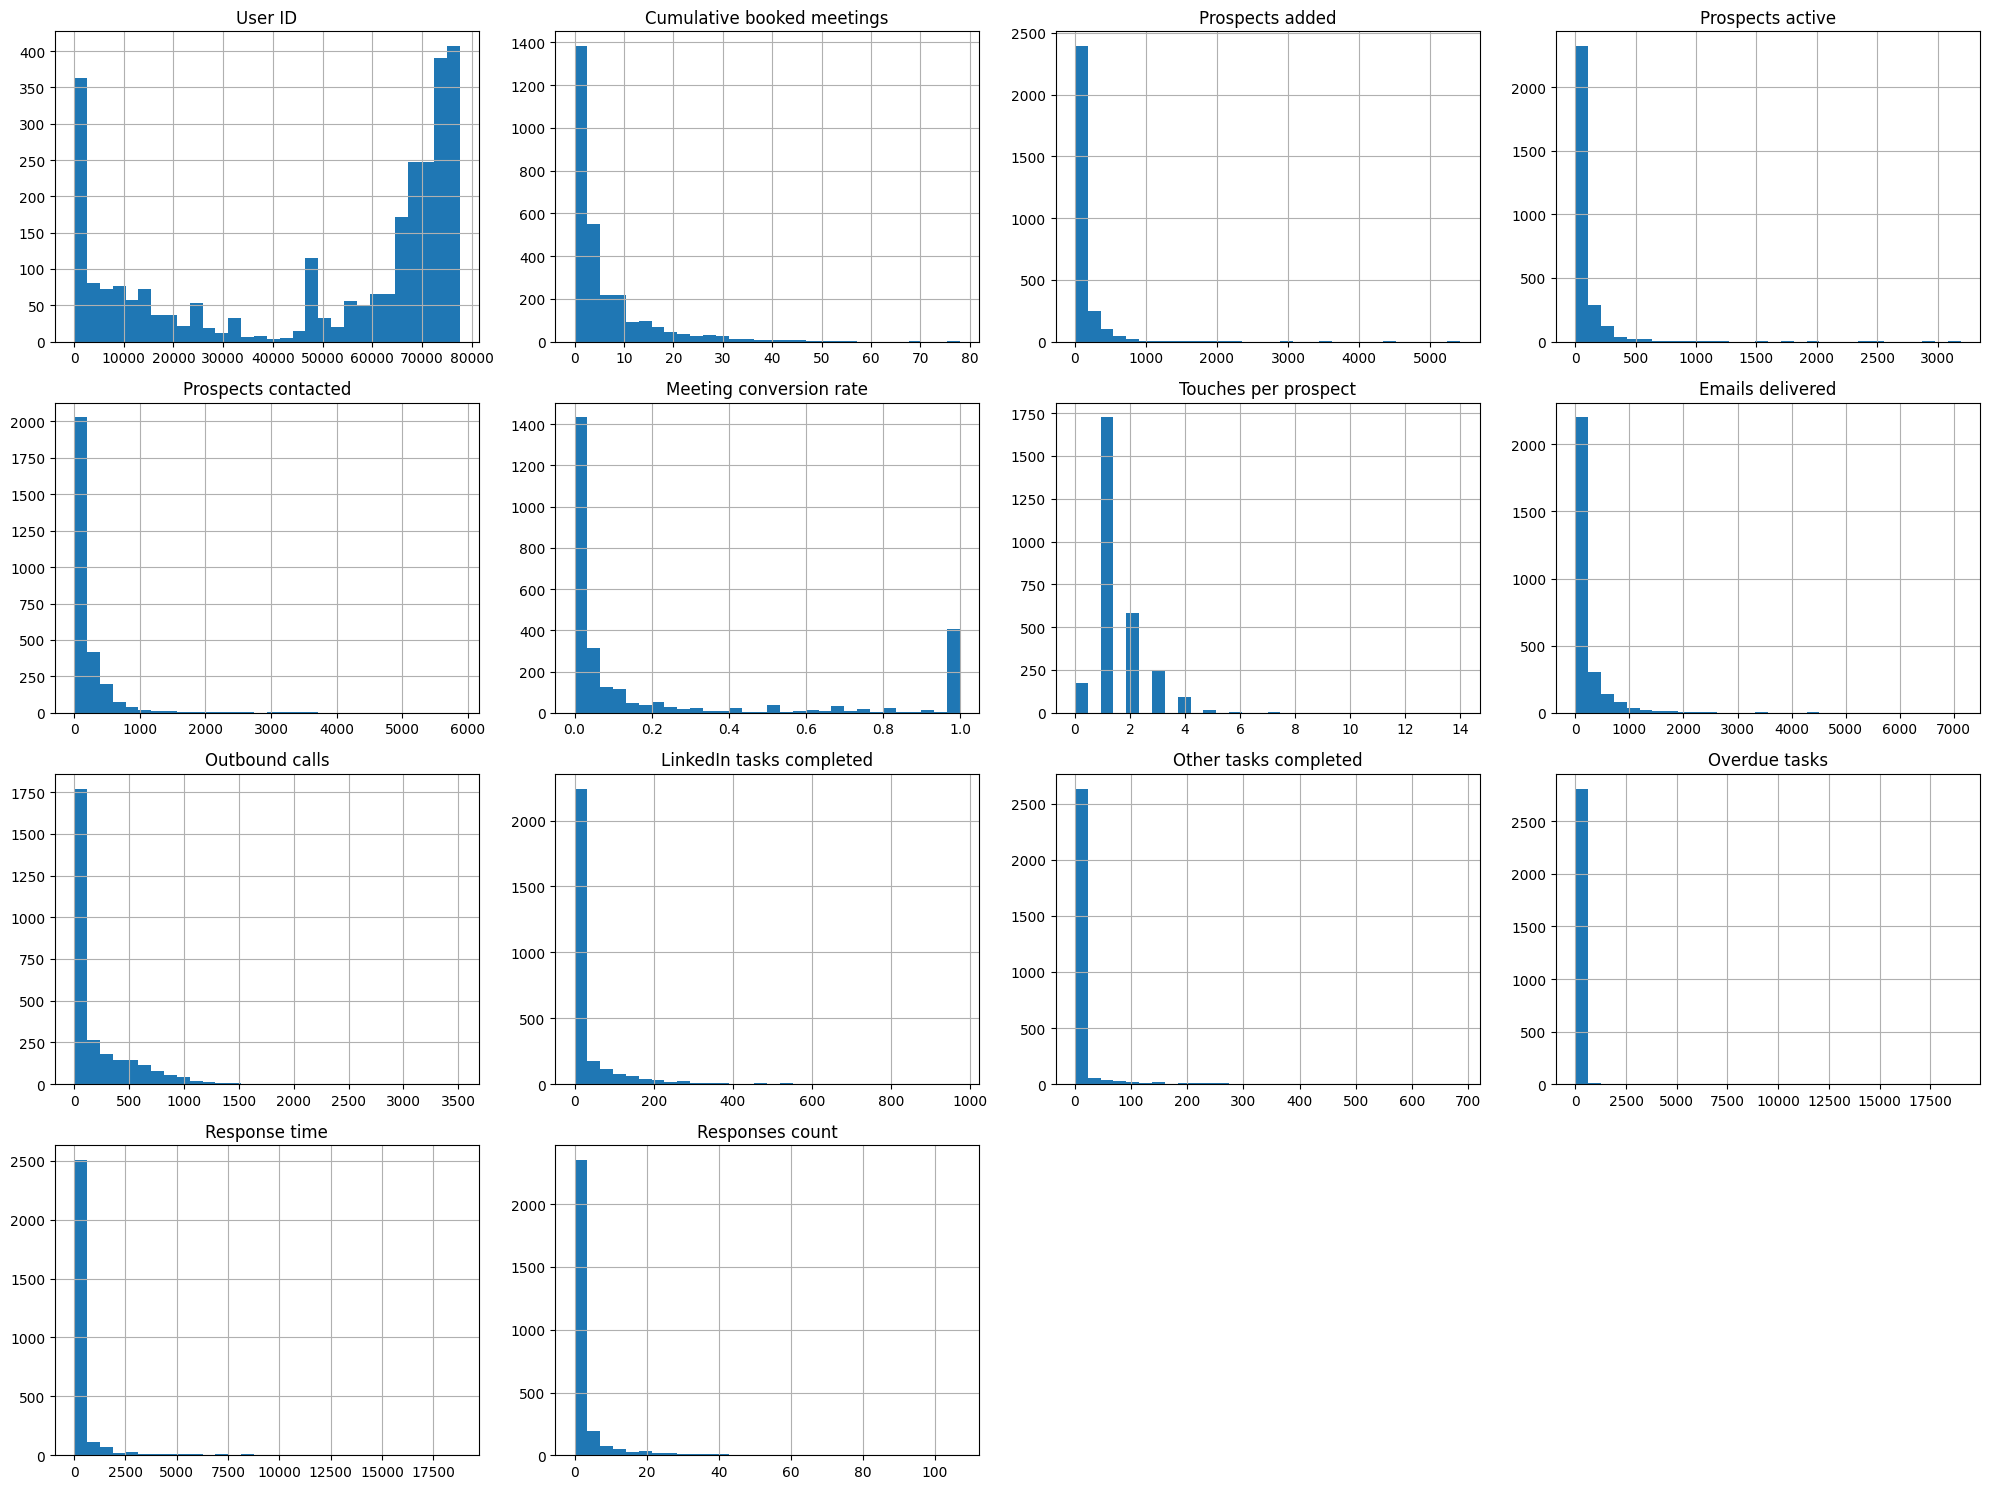

In [4]:
# Plot histograms for all numerical columns
df[numeric_cols].hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

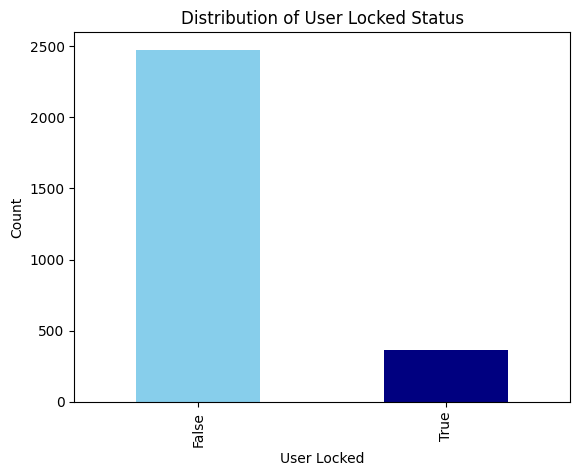

In [5]:
# Bar chart for 'User locked'
df['User locked'].value_counts().plot(kind='bar', color=['skyblue', 'navy'])
plt.xlabel('User Locked')
plt.ylabel('Count')
plt.title('Distribution of User Locked Status')
plt.show()

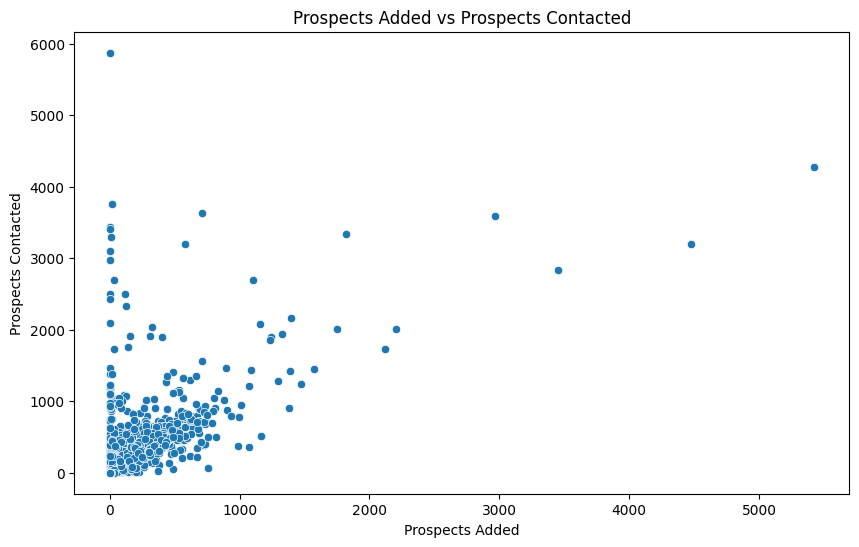

In [6]:
# Scatter plot for 'Prospects added' and 'Prospects contacted'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Prospects added', y='Prospects contacted')
plt.xlabel('Prospects Added')
plt.ylabel('Prospects Contacted')
plt.title('Prospects Added vs Prospects Contacted')
plt.show()

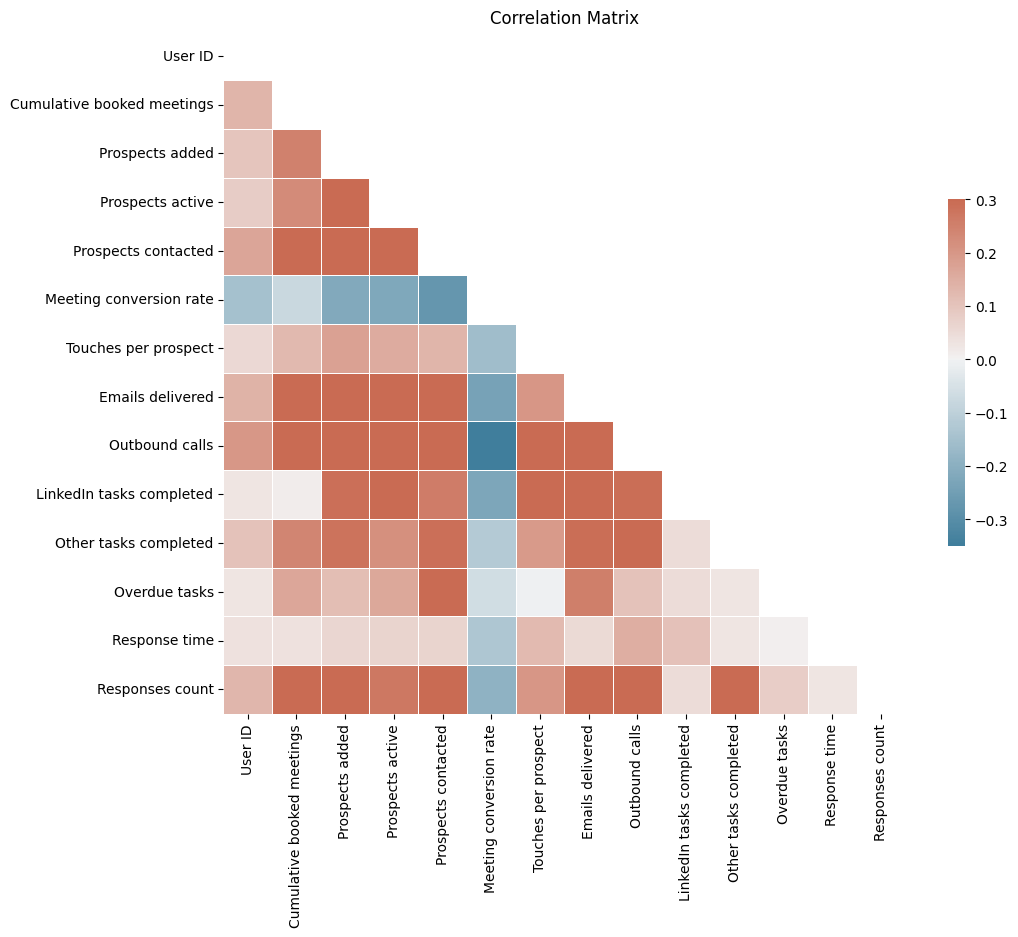

In [7]:
# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

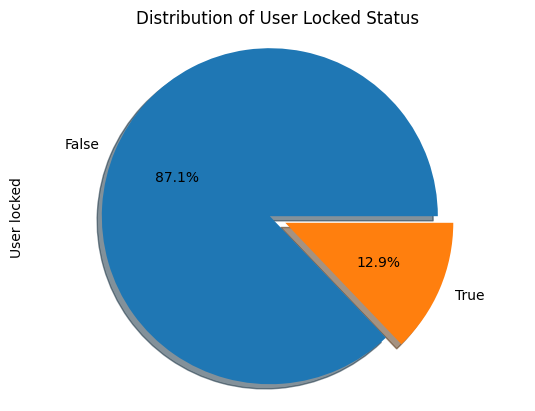

In [8]:
# Pie chart for 'User locked'
df['User locked'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0, 0.1), shadow=True)
plt.title('Distribution of User Locked Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# Calculate the meeting conversion rate and add it as a new column to the DataFrame
df['Meeting conversion rate'] = df['Cumulative booked meetings'] / df['Prospects contacted']
df['Meeting conversion rate'] = df['Meeting conversion rate'].replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN

In [10]:
# Top 10 SDRs who booked the most "quality" meetings
top_10_sdrs = df.sort_values('Meeting conversion rate', ascending=False).head(10)[['User name', 'Meeting conversion rate']]

# Identify active users (those who made more than 20 calls per day over the period)
# Assuming the data covers a 30 day period
active_users = df[df['Outbound calls'] > 20*30]

# Most responsive users (those with the shortest response time)
most_responsive_users = df.sort_values('Response time').head(10)[['User name', 'Response time']]

# Print the insights
print(top_10_sdrs, active_users[['User name', 'Outbound calls']], most_responsive_users)

             User name  Meeting conversion rate
1293  Susan Samoszenko                13.000000
1737     Monique Coats                 4.000000
1620      Randal Fruth                 4.000000
282      Jack Dinwiddy                 3.666667
358      Cynthia Lopez                 3.500000
989       Wendy Devens                 3.500000
375      Chris Jackson                 3.000000
2119        Max Bhakta                 3.000000
144    Michael Brugger                 2.800000
2712         george vu                 2.333333                  User name  Outbound calls
20    christopher guerrero             809
196              Qi Murray             685
221           John Benally             902
320          Ryan Williams            1039
349               Ken Hong             785
...                    ...             ...
2762          Blake Oergel            1389
2764    Javier Rios Duarte             743
2784            Cam Common             795
2797          Clem Beavers             903

In [11]:
# Calculate the 50% most active users
active_users_50_percent = active_users.sample(frac=0.5, random_state=1)

# Calculate top performers among these 50% active users
top_performers_50_percent = active_users_50_percent.sort_values('Meeting conversion rate', ascending=False).head(10)[['User name', 'Meeting conversion rate']]

# Print the top performers among 50% most active users
print(top_performers_50_percent)

                  User name  Meeting conversion rate
847              Tia Prater                 0.137255
2610             Rose Shine                 0.132597
1050               Ben King                 0.132432
2617  Cristian Carrasquillo                 0.126866
2739  Abhishek Kumar Gautam                 0.119914
780       Gabriela Enriquez                 0.109726
2362          Peggy Adamson                 0.106509
2588       KORAIMA GONZALEZ                 0.096866
1333             Tina Clark                 0.094340
2740          Kenneth Brown                 0.089686
